In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,minmax_scale
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
df = pd.read_excel("date_fruit.xlsx")

In [3]:
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AREA,898.0,2.982952e+05,1.072452e+05,1.987000e+03,2.069480e+05,3.198330e+05,3.825730e+05,5.460630e+05
PERIMETER,898.0,2.057661e+03,4.100125e+02,9.118280e+02,1.726091e+03,2.196345e+03,2.389717e+03,2.811997e+03
MAJOR_AXIS,898.0,7.508120e+02,1.440593e+02,3.367227e+02,6.410686e+02,7.913634e+02,8.586338e+02,1.222723e+03
MINOR_AXIS,898.0,4.958728e+02,1.142689e+02,2.283200e+00,4.046844e+02,4.950548e+02,5.890317e+02,7.664536e+02
ECCENTRICITY,898.0,7.374678e-01,8.872739e-02,3.448000e-01,6.856250e-01,7.547000e-01,8.021500e-01,1.000000e+00
EQDIASQ,898.0,6.045779e+02,1.195939e+02,5.029840e+01,5.133171e+02,6.381409e+02,6.979305e+02,8.338279e+02
SOLIDITY,898.0,9.818403e-01,1.815742e-02,8.366000e-01,9.788250e-01,9.873000e-01,9.918000e-01,9.974000e-01
CONVEX_AREA,898.0,3.038456e+05,1.088157e+05,2.257000e+03,2.100228e+05,3.272070e+05,3.888040e+05,5.525980e+05
EXTENT,898.0,7.362671e-01,5.374518e-02,5.123000e-01,7.058750e-01,7.469500e-01,7.758500e-01,8.562000e-01
ASPECT_RATIO,898.0,2.131102e+00,1.782078e+01,1.065300e+00,1.373725e+00,1.524150e+00,1.674750e+00,5.355257e+02


In [6]:
df.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [7]:
print(df.shape)
print(df["Class"].unique())

(898, 35)
['BERHI' 'DEGLET' 'DOKOL' 'IRAQI' 'ROTANA' 'SAFAVI' 'SOGAY']


In [8]:
x = df.drop(["Class"],axis=1)
y = df["Class"]

In [9]:
x_scaled = minmax_scale(x)
x = pd.DataFrame(x_scaled)

In [10]:
x

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.772274,0.772079,0.565604,0.841941,0.446429,0.871512,0.983209,0.767108,0.787438,0.000435,...,0.395739,0.062495,0.053715,0.080752,0.458253,0.455197,0.546327,0.673513,0.550537,0.494665
1,0.617835,0.617480,0.436904,0.775906,0.342186,0.773229,1.000000,0.611906,0.776970,0.000282,...,0.350002,0.037387,0.040885,0.046033,0.687312,0.599151,0.643352,0.538923,0.516341,0.494501
2,0.964674,0.913374,0.681733,0.933143,0.464896,0.981104,0.992537,0.956896,0.736842,0.000467,...,0.472509,0.083531,0.089677,0.096843,0.139263,0.194220,0.312066,0.777967,0.619782,0.573507
3,0.761063,0.757502,0.554467,0.841456,0.430098,0.864727,0.983831,0.755891,0.766502,0.000408,...,0.687121,0.136202,0.278800,0.213061,0.707125,0.657830,0.665214,0.436260,0.377376,0.366683
4,0.635159,0.657060,0.482240,0.759716,0.460470,0.784821,0.958955,0.633316,0.711253,0.000459,...,0.464794,0.040608,0.054459,0.086850,0.634560,0.615256,0.710963,0.581443,0.485820,0.395128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,0.465773,0.533393,0.400815,0.621454,0.578907,0.663606,0.882463,0.470201,0.624019,0.000720,...,0.215776,0.021833,0.030355,0.031264,0.769330,0.797879,0.792768,0.524396,0.360048,0.390293
894,0.668908,0.922547,0.585486,0.718768,0.640415,0.806960,0.684080,0.698311,0.457110,0.000909,...,0.385840,0.069603,0.078511,0.072954,0.711430,0.767717,0.783525,0.489149,0.297087,0.277447
895,0.463801,0.534115,0.463625,0.567071,0.713980,0.662076,0.969527,0.461528,0.615586,0.001217,...,0.314359,0.023207,0.035871,0.030441,0.797356,0.793251,0.802894,0.447747,0.324174,0.362618
896,0.435542,0.523343,0.428810,0.575194,0.675366,0.639781,0.769900,0.447973,0.532422,0.001042,...,0.378900,0.039599,0.042970,0.033852,0.762427,0.774730,0.777411,0.557500,0.402805,0.452067


In [11]:
y

0      BERHI
1      BERHI
2      BERHI
3      BERHI
4      BERHI
       ...  
893    SOGAY
894    SOGAY
895    SOGAY
896    SOGAY
897    SOGAY
Name: Class, Length: 898, dtype: object

In [12]:
y = LabelEncoder().fit_transform(y)

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [14]:
x_train,x_temporary,y_train,y_temporary = train_test_split(x,y, train_size=0.8)

x_val,x_test,y_val,y_test = train_test_split(x_temporary,y_temporary, train_size=0.2)

In [15]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
782,0.617489,0.724352,0.617823,0.641595,0.741148,0.772997,0.922264,0.619354,0.683920,0.001365,...,0.408308,0.120456,0.501216,0.095190,0.952186,0.924965,0.897321,0.092803,0.069250,0.106927
447,0.774960,0.835248,0.609249,0.818446,0.538919,0.873130,0.886194,0.782057,0.639430,0.000620,...,0.207721,0.033263,0.027538,0.032629,0.321033,0.327590,0.410932,0.769137,0.633313,0.639739
426,0.880530,0.861666,0.575976,0.945259,0.264042,0.934655,0.960821,0.877852,0.701367,0.000194,...,0.442932,0.069575,0.095375,0.123193,0.582917,0.518674,0.550369,0.501570,0.435787,0.441960
649,0.654456,0.752506,0.633798,0.665434,0.729243,0.797549,0.879975,0.661068,0.403024,0.001297,...,0.456568,0.318699,0.285092,0.098943,0.914167,0.875750,0.831541,0.158396,0.138816,0.223936
8,1.000000,0.948926,0.654233,1.000000,0.310287,1.000000,0.942786,1.000000,0.752254,0.000244,...,0.326224,0.071774,0.084921,0.099887,0.127203,0.144427,0.205692,0.764687,0.629803,0.644948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,0.715689,0.859374,0.633234,0.726479,0.670177,0.836747,0.798507,0.732864,0.608607,0.001020,...,0.462634,0.085775,0.444946,0.138713,0.945952,0.911536,0.884375,0.075809,0.064352,0.097969
411,0.887527,0.857900,0.604987,0.932501,0.349206,0.938600,0.988806,0.880861,0.752835,0.000291,...,0.379992,0.239616,0.222602,0.108502,0.685265,0.567896,0.450001,0.427179,0.408873,0.531271
735,0.683447,0.745552,0.587525,0.725901,0.634005,0.816325,0.923507,0.685448,0.612387,0.000887,...,0.427767,0.236513,0.399923,0.078419,0.972473,0.929192,0.884947,0.001694,0.028423,0.102412
751,0.647103,0.831666,0.603786,0.684250,0.691850,0.792721,0.743781,0.668700,0.515557,0.001112,...,0.300699,0.342838,0.293727,0.074007,0.888319,0.784030,0.724903,0.228366,0.299116,0.394816


In [16]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
219,0.266213,0.281829,0.249868,0.436686,0.692460,0.487632,0.965796,0.264870,0.810119,0.001115,...,0.104940,0.061648,0.043615,0.027921,0.726789,0.671925,0.720709,0.835121,0.808568,0.804193
220,0.288447,0.308166,0.239919,0.482418,0.599359,0.509915,0.945274,0.288000,0.870020,0.000777,...,0.311569,0.030581,0.056353,0.035857,0.861102,0.873763,0.838241,0.505639,0.361908,0.479942
78,0.410029,0.474664,0.404661,0.538584,0.700092,0.619028,0.967040,0.408111,0.396045,0.001150,...,0.221575,0.016960,0.019364,0.019697,0.602440,0.553965,0.597506,0.795398,0.720609,0.758411
636,0.714123,0.846500,0.613291,0.743376,0.636142,0.835766,0.805348,0.730404,0.578657,0.000894,...,0.382467,0.206877,0.343844,0.097279,0.930873,0.882823,0.829084,0.112646,0.110838,0.195540
462,0.804766,0.872891,0.685285,0.781904,0.652167,0.890903,0.946517,0.804207,0.747892,0.000951,...,0.089072,0.042182,0.055517,0.060337,0.317511,0.364962,0.234597,0.748512,0.587240,0.751604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.271688,0.275561,0.214697,0.470912,0.582418,0.493202,0.978856,0.269749,0.690317,0.000729,...,0.335784,0.041880,0.074989,0.045594,0.897686,0.893677,0.878587,0.433678,0.344850,0.406475
364,0.265424,0.280694,0.232679,0.447513,0.653846,0.486825,0.947761,0.264863,0.768828,0.000957,...,0.263891,0.029763,0.047622,0.032832,0.834705,0.841348,0.824894,0.610027,0.477662,0.560972
562,0.617228,0.692182,0.539786,0.706613,0.613095,0.772821,0.818408,0.629846,0.633033,0.000819,...,0.217232,0.033655,0.039520,0.036362,0.574439,0.556963,0.610204,0.654731,0.543865,0.539667
117,0.359319,0.419711,0.352063,0.508734,0.691392,0.575784,0.947761,0.358714,0.780459,0.001110,...,0.136628,0.068467,0.046325,0.055642,0.652089,0.667637,0.665598,0.811599,0.664038,0.746278


In [17]:
y_train

array([5, 4, 3, 5, 0, 0, 5, 2, 3, 6, 2, 5, 1, 4, 2, 6, 5, 5, 1, 1, 4, 5,
       4, 6, 4, 4, 2, 2, 2, 4, 1, 0, 4, 5, 2, 2, 4, 4, 5, 0, 2, 0, 2, 1,
       2, 4, 1, 5, 5, 2, 0, 2, 2, 2, 1, 0, 5, 2, 5, 5, 2, 2, 1, 4, 5, 0,
       2, 4, 0, 5, 2, 5, 2, 5, 5, 6, 2, 2, 0, 1, 5, 3, 3, 0, 1, 2, 2, 4,
       2, 5, 2, 5, 4, 1, 2, 1, 0, 2, 5, 0, 1, 5, 4, 6, 6, 5, 4, 5, 3, 5,
       4, 0, 2, 2, 4, 0, 5, 3, 6, 6, 5, 1, 6, 4, 2, 4, 2, 1, 2, 2, 2, 4,
       4, 5, 4, 2, 6, 3, 4, 3, 1, 3, 2, 5, 0, 5, 6, 6, 3, 2, 6, 2, 2, 4,
       1, 6, 5, 2, 1, 1, 1, 2, 2, 5, 4, 6, 5, 2, 3, 3, 5, 4, 5, 2, 2, 6,
       0, 0, 2, 2, 2, 1, 5, 5, 2, 1, 4, 2, 4, 4, 5, 5, 5, 6, 6, 1, 4, 2,
       5, 1, 4, 4, 4, 2, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 5, 1, 0, 4, 3, 5,
       2, 2, 3, 2, 2, 6, 5, 5, 5, 4, 6, 5, 5, 5, 3, 3, 1, 3, 6, 3, 2, 5,
       4, 2, 5, 1, 4, 3, 2, 1, 3, 2, 5, 0, 0, 5, 5, 1, 2, 5, 2, 5, 5, 1,
       1, 2, 5, 4, 2, 6, 4, 5, 5, 0, 3, 1, 5, 3, 2, 2, 2, 2, 2, 1, 6, 5,
       2, 5, 4, 6, 2, 6, 5, 0, 0, 0, 2, 6, 4, 1, 1,

In [18]:
y_test

array([2, 2, 1, 5, 4, 3, 2, 5, 2, 2, 4, 2, 6, 5, 5, 3, 2, 6, 5, 3, 2, 0,
       1, 5, 6, 5, 2, 5, 4, 2, 2, 2, 4, 3, 5, 3, 1, 6, 3, 6, 2, 2, 6, 4,
       4, 3, 0, 6, 6, 4, 5, 2, 2, 5, 0, 4, 6, 6, 3, 4, 5, 4, 1, 6, 2, 4,
       4, 1, 2, 5, 2, 0, 0, 4, 3, 6, 6, 2, 2, 4, 2, 4, 2, 6, 5, 1, 2, 2,
       2, 2, 6, 5, 2, 2, 4, 2, 0, 2, 4, 5, 5, 4, 1, 6, 6, 2, 0, 5, 5, 2,
       3, 4, 6, 1, 2, 1, 2, 2, 3, 3, 0, 5, 5, 1, 4, 2, 4, 1, 2, 2, 0, 6,
       0, 2, 4, 3, 1, 4, 4, 2, 2, 4, 1, 1])

In [19]:
print(f"Lenght of the dataset:{len(x)}")
print(f"Lenght of the dataset:{len(x_train)}")
print(f"Lenght of the dataset:{len(x_val)}")
print(f"Lenght of the dataset:{len(x_test)}")

Lenght of the dataset:898
Lenght of the dataset:718
Lenght of the dataset:36
Lenght of the dataset:144


In [20]:
model = tf.keras.Sequential()

In [21]:
input_layer = tf.keras.layers.Dense(4096,input_shape=(34,),activation="relu") # input shap sütun sayısı 4096 düğüm sayısı relu de aktivasyon fonksiyonu
model.add(input_layer)

In [22]:
model.add(tf.keras.layers.Dense(4096,activation="relu")) # gizli katman
model.add(tf.keras.layers.Dropout(0.5)) # Dropout, en basit tabirle sinir ağlarında fazla uyumu önlemek için kullanılır. Belirli bir katmandaki bazı düğümlerin değerleri sıfıra ayarlanır. Bu düğümler rastgele seçilir ve “kapatılacak” düğümlerin sayısı, bırakma oranına göre seçilir. Her yinelemede, farklı düğümler seçilebilir. Bizim durumumuzda, bırakma oranını 0,5 olarak ayarladığımız için düğümlerin yarısı kapanacaktır. 
model.add(tf.keras.layers.Dense(4096,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4096,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [23]:
model.add(tf.keras.layers.Dense(7,activation="softmax")) # çıktı katmanı 7--> hedef sınıf sayısı İkiden fazla sınıfımız olduğu için çıktı katmanında softmax aktivasyon fonksiyonunu kullanacağız. Softmax işlevi, sayıları olasılıklara dönüştürür.

In [24]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])# Adam optimizer, derin öğrenme modelleri için stokastik gradyan inişinin ve "git" algoritmasının genişletilmiş bir sürümüdür.Bunun nedeni, Adam optimizer'ın sonuçlarının genellikle diğer tüm optimizasyon algoritmalarından daha iyi olması, daha hızlı hesaplama süresine sahip olması ve ayarlama için daha az parametre gerektirmesidir.

In [25]:
results = model.fit(x_train,y_train,epochs=100,validation_data=(x_val,y_val))

Epoch 1/100
23/23 [==============================] - 6s 246ms/step - loss: 1.4135 - accuracy: 0.5097 - val_loss: 0.6061 - val_accuracy: 0.7500
Epoch 2/100
23/23 [==============================] - 6s 244ms/step - loss: 0.8365 - accuracy: 0.6852 - val_loss: 0.7673 - val_accuracy: 0.7222
Epoch 3/100
23/23 [==============================] - 6s 248ms/step - loss: 0.6448 - accuracy: 0.7382 - val_loss: 0.4775 - val_accuracy: 0.8056
Epoch 4/100
23/23 [==============================] - 6s 250ms/step - loss: 0.5525 - accuracy: 0.7869 - val_loss: 0.9441 - val_accuracy: 0.6944
Epoch 5/100
23/23 [==============================] - 6s 247ms/step - loss: 0.4915 - accuracy: 0.7953 - val_loss: 0.6329 - val_accuracy: 0.8333
Epoch 6/100
23/23 [==============================] - 6s 242ms/step - loss: 0.5653 - accuracy: 0.7855 - val_loss: 0.5508 - val_accuracy: 0.7778
Epoch 7/100
23/23 [==============================] - 6s 241ms/step - loss: 0.4909 - accuracy: 0.8092 - val_loss: 0.6980 - val_accuracy: 0.6944

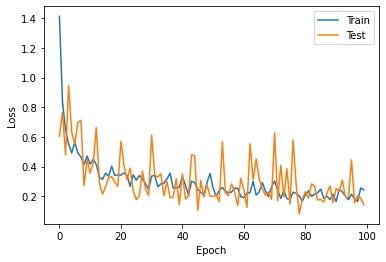

In [26]:
plt.plot(results.history["loss"],label="Train")
plt.plot(results.history["val_loss"],label="Test")

plt.ylabel("Loss")
plt.xlabel("Epoch")

plt.legend()

plt.show()

In [27]:
test_result = model.test_on_batch(x_test,y_test)
print(test_result)

[0.18458858132362366, 0.9097222089767456]
